<a href="https://colab.research.google.com/github/VimalChamyal/Logistic-Regression/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the essential libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset from github

In [45]:
url = 'https://raw.githubusercontent.com/VimalChamyal/Logistic-Regression/main/gender_classification.csv'
df1 = pd.read_csv(url)
df1.head()
# 1 means nose is wide, nose is long, lips are thin, distance from nose to lip is long

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
0,0CM,12.6,5.1,1.0,1.0,1.0,1.0,Male
1,33CM,12.2,5.1,0.0,0.0,0.0,1.0,Female
2,34CM,13.3,6.5,1.0,0.0,0.0,1.0,Female
3,42CM,13.4,6.1,0.0,0.0,0.0,0.0,Female
4,25CM,12.3,6.1,1.0,0.0,0.0,0.0,Female


In [46]:
df1.describe()
# We can see that the count is not the same for all the features

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,13.170026,5.960388,0.50000,0.505600,0.502000,0.506200
std,1.072602,0.552536,0.50005,0.500019,0.500046,0.500012
min,11.400000,5.100000,0.00000,0.000000,0.000000,0.000000
25%,12.300000,5.500000,0.00000,0.000000,0.000000,0.000000
50%,13.100000,5.900000,0.50000,1.000000,1.000000,1.000000
75%,14.000000,6.400000,1.00000,1.000000,1.000000,1.000000
max,15.500000,7.100000,1.00000,1.000000,1.000000,1.000000


In [47]:
df1.corr()

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
forehead_width_cm,1.000000,0.085950,0.206128,0.203093,0.198482,0.209695
forehead_height_cm,0.085950,1.000000,0.195693,0.223585,0.194895,0.204632
nose_wide,0.206128,0.195693,1.000000,0.556835,0.562404,0.558043
nose_long,0.203093,0.223585,0.556835,1.000000,0.570396,0.577142
lips_thin,0.198482,0.194895,0.562404,0.570396,1.000000,0.553197
distance_nose_to_lip_long,0.209695,0.204632,0.558043,0.577142,0.553197,1.000000


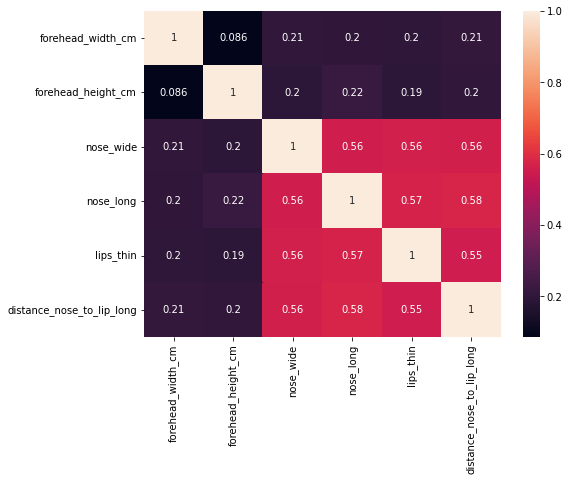

In [48]:
plt.figure(figsize = (8,6))
sns.heatmap(df1.corr(), annot = True)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                5001 non-null   object 
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5000 non-null   float64
 4   nose_long                  5000 non-null   float64
 5   lips_thin                  5000 non-null   float64
 6   distance_nose_to_lip_long  5000 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.7+ KB


Converting the object datatype to int/float and trimming the data

In [50]:
df1['hair_length'].unique()

array(['0CM', '33CM', '34CM', '42CM', '25CM', '38CM', '13CM', '4CM',
       '36CM', '9CM', '31CM', '46CM', '12CM', '5CM', '14CM', '1CM',
       '30CM', '7CM', '45CM', '19CM', '39CM', '43CM', '2CM', '11CM',
       '41CM', '8CM', '35CM', '10CM', '26CM', '6CM', '3CM', '49CM',
       '24CM', '22CM', '32CM', '17CM', '47CM', '28CM', '29CM', '27CM',
       '50CM', '23CM', '37CM', '40CM', '16CM', '15CM', '18CM', '20CM',
       '48CM', '44CM', '21CM'], dtype=object)

In [51]:
df1['hair_length'].head()
# We can see clearly that we need to remove 'CM' part

0     0CM
1    33CM
2    34CM
3    42CM
4    25CM
Name: hair_length, dtype: object

In [52]:
df1['hair_length'] = df1['hair_length'].apply(lambda x: int(x[:-2]))

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5000 non-null   float64
 4   nose_long                  5000 non-null   float64
 5   lips_thin                  5000 non-null   float64
 6   distance_nose_to_lip_long  5000 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 312.7+ KB


In [56]:
df1['Gender'].unique()
# We need to deal with the nan values

array(['Male', 'Female', nan], dtype=object)

Checking and dealing with the null values

In [60]:
df1[df1.isnull().any(axis=1)]
# Here we see the null values in our entire dataset

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender
46,9,13.7,5.6,1.0,1.0,1.0,1.0,NaN
289,35,11.5,5.5,NaN,NaN,NaN,NaN,NaN
660,30,14.2,5.5,0.0,0.0,0.0,0.0,NaN
1057,5,12.8,5.4,1.0,1.0,1.0,1.0,NaN
1682,5,12.4,5.9,0.0,0.0,0.0,0.0,NaN
1690,10,14.9,6.3,0.0,1.0,1.0,1.0,NaN
1738,42,11.4,6.1,0.0,0.0,0.0,0.0,NaN
1811,25,13.1,5.1,0.0,0.0,0.0,0.0,NaN
2297,3,14.7,5.5,1.0,1.0,1.0,1.0,NaN
2371,1,14.5,5.9,1.0,0.0,1.0,1.0,NaN


Dropping the null values

In [67]:
df1.dropna(inplace = True)
df1[df1.isnull().any(axis=1)]
# We can see clearly that our dataset has no null values at all

,hair_length,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,Gender


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hair_length                4987 non-null   int64  
 1   forehead_width_cm          4987 non-null   float64
 2   forehead_height_cm         4987 non-null   float64
 3   nose_wide                  4987 non-null   float64
 4   nose_long                  4987 non-null   float64
 5   lips_thin                  4987 non-null   float64
 6   distance_nose_to_lip_long  4987 non-null   float64
 7   Gender                     4987 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 350.6+ KB


Splitting the data

In [77]:
X = df1.drop('Gender', axis = 1)
y = df1['Gender']

Train Test Split

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [83]:
X_train.shape

(3989, 7)

In [84]:
X_test.shape

(998, 7)

Importing Logistic Regession 

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression()

Training the model

In [92]:
model.fit(X_train, y_train)

LogisticRegression()

Checking the prediction

In [94]:
prediction = model.predict(X_test)
prediction[0]

'Male'

In [110]:
np_y_test = np.array(y_test)
# Need to convert the column to a numpy array
np_y_test[0]
# We can see that the prediction is right for the index 0

'Male'

Confusion matrix and classification report

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Confusion matrix

In [112]:
print(confusion_matrix(y_test, prediction))

[[478   4]
 [  3 513]]


Classification Report

In [113]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      Female       0.99      0.99      0.99       482
        Male       0.99      0.99      0.99       516

    accuracy                           0.99       998
   macro avg       0.99      0.99      0.99       998
weighted avg       0.99      0.99      0.99       998

